In [ ]:
pip install fuzzy-c-means

In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [3]:
n_samples = 5000

X = np.concatenate((
    np.random.normal((-6, -6), size=(n_samples, 2)),
    np.random.normal((6, 6), size=(n_samples, 2))
))

In [ ]:
X

array([[-7.25923045, -6.0936634 ],
       [-5.48581312, -7.62459722],
       [-6.89923207, -5.91390391],
       ...,
       [ 6.5912423 ,  6.50333364],
       [ 5.47302227,  5.95572788],
       [ 7.34027078,  6.36020599]])

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [ ]:
fcm._FCM__predict(X)

DeviceArray([[4.8828893e-03, 9.9511707e-01],
             [9.0046255e-03, 9.9099535e-01],
             [2.6141631e-03, 9.9738580e-01],
             ...,
             [9.9807078e-01, 1.9292044e-03],
             [9.9902689e-01, 9.7307703e-04],
             [9.9413514e-01, 5.8648470e-03]], dtype=float32)

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

print(fcm_centers)
print(fcm_labels)

[[ 5.987774   6.008283 ]
 [-6.0053225 -6.0074873]]
[1 1 1 ... 0 0 0]


In [ ]:
fcm_centers

Buffer([[ 2.0216815,  2.027449 ],
        [-2.0445051, -2.0221655]], dtype=float32)

In [ ]:
fcm_labels

DeviceArray([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
fcm.partition_coefficient

DeviceArray(0.9863664, dtype=float32)

In [ ]:
fcm.predict(X)

DeviceArray([1, 1, 1, ..., 0, 0, 0], dtype=int32)

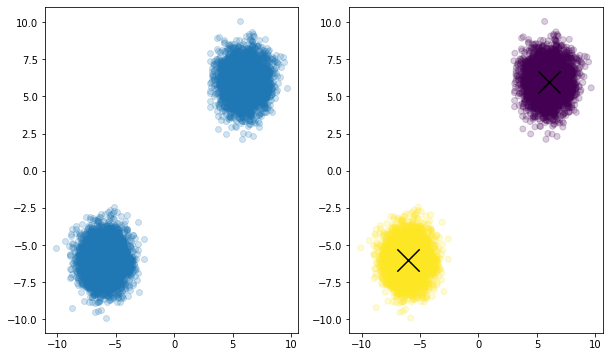

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X[:,0], X[:,1], alpha=.2)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.2)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="x", s=500, c='k')
# plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=a43fa5b3d3f15e39bd5e6ebbffd124dbdab362a8ae5da8f91a2e27f5db4be7a9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [ ]:
ncenters = 2

In [ ]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, 2, 2, error=0.005, maxiter=1000, init=None)

In [ ]:
print(jm)

[455111.73487043 369655.27977635 360781.98642801 254951.874783
  28652.6298469   20016.75870875  20015.04148107]


In [ ]:
print(cntr)
print(u)
print(u0)
print(d)
print(jm)
print(p)
print(fpc)

[[-6.00530594 -6.00747263]
 [ 5.98776001  6.00826935]]
[[9.95116967e-01 9.90995260e-01 9.97385744e-01 ... 1.92930509e-03
  9.73023137e-04 5.86499959e-03]
 [4.88303348e-03 9.00474019e-03 2.61425588e-03 ... 9.98070695e-01
  9.99026977e-01 9.94135000e-01]]
[[0.41509357 0.3334443  0.87290057 ... 0.7251047  0.57956593 0.66795254]
 [0.58490643 0.6665557  0.12709943 ... 0.2748953  0.42043407 0.33204746]]
[[ 1.25688325  1.6985184   0.89880978 ... 17.75368416 16.57920942
  18.19516124]
 [17.94267351 17.81847164 17.55598987 ...  0.78056359  0.51741235
   1.39754957]]
[455111.73487043 369655.27977635 360781.98642801 254951.874783
  28652.6298469   20016.75870875  20015.04148107]
7
0.9861148642235188


In [ ]:
cluster_membership = np.argmax(u, axis=0)

In [ ]:
cluster_membership

array([0, 0, 0, ..., 1, 1, 1])

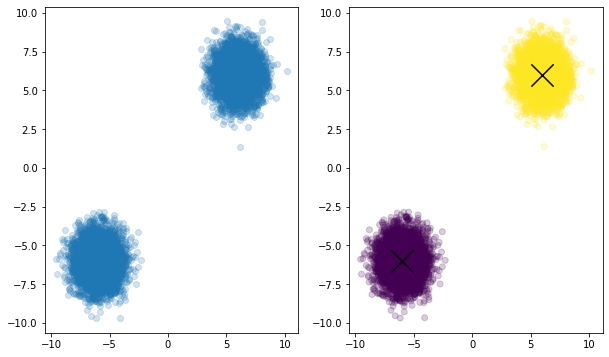

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X[:,0], X[:,1], alpha=.2)
axes[1].scatter(X[:,0], X[:,1], c=cluster_membership, alpha=.2)
axes[1].scatter(cntr[:,0], cntr[:,1], marker="x", s=500, c='k')
# plt.savefig('output.jpg')
plt.show()

In [2]:
### Importing the required Libraries

import pandas as pd
import numpy as np
import random
import operator
import math

In [4]:
df = pd.DataFrame(X)
df

,0,1
0,-5.897600,-7.833787
1,-5.112685,-5.574917
2,-4.266350,-5.823344
3,-6.954694,-5.545967
4,-6.227015,-8.186102
...,...,...
9995,5.672492,6.212170
9996,6.525362,7.206789
9997,6.459906,6.070439
9998,6.613339,5.815001


In [6]:
# Number of Attributes
num_attr = len(df.columns) - 1

# Number of Clusters to make
k = 2

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(df)

# Fuzzy parameter
m = 2.00

# Fuzzy C-means Algorithm


[Reference1](https://github.com/ShristiK/Fuzzy-C-Means-Clustering) <br>
[Reference2](https://www.kaggle.com/prateekk94/fuzzy-c-means-clustering-on-iris-dataset)

## Step 1 : Initializing the Membership Matrix with Random Values

In [7]:
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

## Step 2 : Calculating the Cluster Center¶


In [11]:
### calculating the cluster center, is done in every iteration

def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    for j in range(k):
        x = next(cluster_mem_val) # x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [12]:
calculateClusterCenter(membership_mat)

[[0.0625046020979404, 0.08947541670606272],
 [-0.02439863900920742, -0.04095063030228161]]

## Step 3 : Updating Membership Values using Cluster Centers from Step 2

In [17]:
### updating the membership values using the cluster centers

def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

### Function defined which returns the Clusters from the Membership Matrix

In [18]:
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

### Calling fcm function which runs for MAX_ITER number of times and returns the Result

In [19]:
### the final fcm function, 

def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    
    print(membership_mat)
    return cluster_labels, cluster_centers

In [20]:
### calling the main function and storing the final results in labels, centers

print("printing the final membership matrix")

labels, centers = fuzzyCMeansClustering()

print("printing cluster centers")
print(centers)

printing the final membership matrix
[[0.009748644171389828, 0.9902513558286101], [0.003917413644238914, 0.996082586355761], [0.012433477438777313, 0.9875665225612228], [0.003671968832430321, 0.9963280311675696], [0.0132345877039676, 0.9867654122960324], [0.011474145857980822, 0.9885258541420193], [0.003442296068538628, 0.9965577039314613], [0.005023155880108857, 0.9949768441198911], [0.0012290295169559095, 0.998770970483044], [0.009537233244231575, 0.9904627667557685], [0.013391235139110353, 0.9866087648608897], [0.0001243204901577333, 0.9998756795098422], [0.015843452635066115, 0.984156547364934], [0.005111150696811724, 0.9948888493031883], [0.0019817135571919557, 0.9980182864428081], [0.0040867948227775695, 0.9959132051772226], [0.025084914520077266, 0.9749150854799228], [0.00447641178870687, 0.9955235882112932], [0.002049420044794579, 0.9979505799552055], [0.008101836819771056, 0.9918981631802289], [0.0007142622346724129, 0.9992857377653277], [0.0024266054258582108, 0.9975733945741